# STATISTICS

Name: Minan Abdillah 

ID: PYTN-KS16-010

BACKGROUND

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

* BOROUGH : A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
BLOCK; LOT :The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
* BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: : The type of building at various points in time.

import modul

In [10]:
import numpy as np
import pandas as pd
import scipy.stats

import dataset

In [11]:
df = pd.read_csv('dataset/nyc-rolling-sales.csv')

exploration dataset

In [12]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


merubah kolom sale date menjadi datetime

In [13]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

In [14]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17


replace nama kolom

In [15]:
df.columns = df.columns.str.replace(' ', '_')

coerce untuk missning values ketiga kolom tersebut

In [16]:
numer = ['LAND_SQUARE_FEET','GROSS_SQUARE_FEET', 'SALE_PRICE']
for col in numer: # coerce for missing values
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [17]:
df.isnull().sum()

Unnamed:_0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING_CLASS_CATEGORY               0
TAX_CLASS_AT_PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING_CLASS_AT_PRESENT             0
ADDRESS                               0
APARTMENT_NUMBER                      0
ZIP_CODE                              0
RESIDENTIAL_UNITS                     0
COMMERCIAL_UNITS                      0
TOTAL_UNITS                           0
LAND_SQUARE_FEET                  26252
GROSS_SQUARE_FEET                 27612
YEAR_BUILT                            0
TAX_CLASS_AT_TIME_OF_SALE             0
BUILDING_CLASS_AT_TIME_OF_SALE        0
SALE_PRICE                        14561
SALE_DATE                             0
dtype: int64

mengisi missing values

In [18]:
df['LAND_SQUARE_FEET'].fillna(df['LAND_SQUARE_FEET'].mean(),inplace=True)
df['GROSS_SQUARE_FEET'].fillna(df['GROSS_SQUARE_FEET'].mean(),inplace=True)
df['SALE_PRICE'].fillna(df['SALE_PRICE'].median(),inplace=True)

In [19]:
df.head()

,Unnamed:_0,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616.0,18690.0,1900,2,C7,530000.0,2016-12-14
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212.0,7803.0,1900,2,C7,530000.0,2016-12-09
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


In [20]:
df.isnull().sum()

Unnamed:_0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING_CLASS_CATEGORY           0
TAX_CLASS_AT_PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING_CLASS_AT_PRESENT         0
ADDRESS                           0
APARTMENT_NUMBER                  0
ZIP_CODE                          0
RESIDENTIAL_UNITS                 0
COMMERCIAL_UNITS                  0
TOTAL_UNITS                       0
LAND_SQUARE_FEET                  0
GROSS_SQUARE_FEET                 0
YEAR_BUILT                        0
TAX_CLASS_AT_TIME_OF_SALE         0
BUILDING_CLASS_AT_TIME_OF_SALE    0
SALE_PRICE                        0
SALE_DATE                         0
dtype: int64

menghapus kolom yang tidak diperlukan

In [21]:
df1 = df.drop(columns=['Unnamed:_0', 'EASE-MENT', 'APARTMENT_NUMBER', 'ZIP_CODE'])

In [22]:
df1

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,28,3,31,4616.0,18690.0,1900,2,C7,530000.0,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,16,1,17,2212.0,7803.0,1900,2,C7,530000.0,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


In [23]:
df1.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'BUILDING_CLASS_AT_PRESENT',
       'ADDRESS', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DATE'],
      dtype='object')

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  int64         
 1   NEIGHBORHOOD                    84548 non-null  object        
 2   BUILDING_CLASS_CATEGORY         84548 non-null  object        
 3   TAX_CLASS_AT_PRESENT            84548 non-null  object        
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING_CLASS_AT_PRESENT       84548 non-null  object        
 7   ADDRESS                         84548 non-null  object        
 8   RESIDENTIAL_UNITS               84548 non-null  int64         
 9   COMMERCIAL_UNITS                84548 non-null  int64         
 10  TOTAL_UNITS                     84548 non-null  int64         
 11  LA

merubah tipe data kolom

In [25]:
categoricals_columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY', 'TAX_CLASS_AT_PRESENT', 
                'YEAR_BUILT', 'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
                'BUILDING_CLASS_AT_PRESENT']
float_columns = ['SALE_PRICE', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET']
integer_columns = ['BLOCK', 'LOT']

# ubah kolom yang seharusnya kategori menjadi tipe 'str'
for col in categoricals_columns:
    df1[col] = df1[col].astype('str')

# ubah kolom yang seharusnya float menjadi tipe 'float'
for col in float_columns:
    df1[col] = df1[col].astype('float64')

# ubah kolom yang seharusnya int menjadi tipe 'int'
for col in integer_columns:
    df1[col] = df1[col].astype('int64')

merubah angka yang ada di borough menjadi nama kota

In [26]:
df1['BOROUGH'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)

In [27]:
df1

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,28,3,31,4616.0,18690.0,1900,2,C7,530000.0,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,16,1,17,2212.0,7803.0,1900,2,C7,530000.0,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


In [28]:
df1.index = range(0,len(df1))

In [29]:
df1

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,28,3,31,4616.0,18690.0,1900,2,C7,530000.0,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,16,1,17,2212.0,7803.0,1900,2,C7,530000.0,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


memisahkan kolom yang ada di sale date

In [30]:
df1['SALE DATE'] = pd.to_datetime(df1['SALE_DATE'])
df1['SALE YEAR'] = df1['SALE_DATE'].dt.year
df1['SALE MONTH'] = df1['SALE_DATE'].dt.month_name()
df1['SALE DATE dt'] = df1['SALE_DATE'].dt.day
df1['SALE DAY'] = df1['SALE_DATE'].dt.day_name()
df1.drop('SALE_DATE',inplace=True, axis=1)

# rename kolom SALE DATE dt menjadi SALE DATE
df1.rename(columns={'SALE DATE dt':'SALE DATE'},inplace=True)

kode diatas adalah merubah sale date menjadi beberapa kolom seperti year, day, date, dan month

In [31]:
df1

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,...,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE DATE,SALE YEAR,SALE MONTH,SALE DATE,SALE DAY
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,5,0,...,6440.0,1900,2,C2,6625000.0,2017-07-19,2017,July,19,Wednesday
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,28,3,...,18690.0,1900,2,C7,530000.0,2016-12-14,2016,December,14,Wednesday
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,16,1,...,7803.0,1900,2,C7,530000.0,2016-12-09,2016,December,9,Friday
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10,0,...,6794.0,1913,2,C4,3936272.0,2016-09-23,2016,September,23,Friday
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,6,0,...,4615.0,1900,2,C2,8000000.0,2016-11-17,2016,November,17,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,2,0,...,2575.0,1998,1,B9,450000.0,2016-11-28,2016,November,28,Monday
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,2,0,...,2377.0,1998,1,B9,550000.0,2017-04-21,2017,April,21,Friday
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,2,0,...,1496.0,1925,1,B2,460000.0,2017-07-05,2017,July,5,Wednesday
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,0,7,...,64117.0,2001,4,K6,11693337.0,2016-12-21,2016,December,21,Wednesday


percobaan statistic

In [32]:
X = df1['SALE_PRICE']

In [21]:
mean_ = sum(X)/len(X)

In [22]:
mean_

1147900.4933174055

In [23]:
median_ = np.median(X)
print(median_)

530000.0


In [24]:
median_ = np.median(X[:-1])
print(median_)

530000.0


In [25]:
mode_ = scipy.stats.mode(X)

C:\Users\MINAN\AppData\Local\Temp\ipykernel_920\3405252325.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_ = scipy.stats.mode(X)


In [26]:
print(mode_)

ModeResult(mode=array([530000.]), count=array([14771]))


In [27]:
var_ = np.var(X, ddof=1)

In [28]:
print(var_)

107756447924177.75


In [29]:
std_ = var_ ** 0.5

In [30]:
print(std_)

10380580.326945972


In [31]:
np.std(X, ddof=1)

10380580.326945972

In [32]:
n = len(X)
mean_ = sum(X)/n
var_ = sum((item - mean_)**2 for item in X) / (n-1)
std_ = var_ ** 0.5

skew_ = (sum((item - mean_)**3 for item in X)*n/((n-1)*(n-2)*std_**3))


In [33]:
skew_

136.27960105573038

In [34]:
scipy.stats.skew(X, bias=False)

136.27960105575627

In [35]:
precentile_ = np.percentile(X, 20)

In [36]:
precentile_

212000.0

In [37]:
range_ = np.ptp(X)

In [38]:
range_

2210000000.0

# Mean

EDA 1
PERBANDINGAN RATA-RATA DUA KOTA

In [41]:
df1['NEIGHBORHOOD'].unique()

array(['ALPHABET CITY', 'CHELSEA', 'CHINATOWN', 'CIVIC CENTER', 'CLINTON',
       'EAST VILLAGE', 'FASHION', 'FINANCIAL', 'FLATIRON', 'GRAMERCY',
       'GREENWICH VILLAGE-CENTRAL', 'GREENWICH VILLAGE-WEST',
       'HARLEM-CENTRAL', 'HARLEM-EAST', 'HARLEM-UPPER', 'HARLEM-WEST',
       'INWOOD', 'JAVITS CENTER', 'KIPS BAY', 'LITTLE ITALY',
       'LOWER EAST SIDE', 'MANHATTAN VALLEY', 'MIDTOWN CBD',
       'MIDTOWN EAST', 'MIDTOWN WEST', 'MORNINGSIDE HEIGHTS',
       'MURRAY HILL', 'ROOSEVELT ISLAND', 'SOHO', 'SOUTHBRIDGE',
       'TRIBECA', 'UPPER EAST SIDE (59-79)', 'UPPER EAST SIDE (79-96)',
       'UPPER EAST SIDE (96-110)', 'UPPER WEST SIDE (59-79)',
       'UPPER WEST SIDE (79-96)', 'UPPER WEST SIDE (96-116)',
       'WASHINGTON HEIGHTS LOWER', 'WASHINGTON HEIGHTS UPPER', 'BATHGATE',
       'BAYCHESTER', 'BEDFORD PARK/NORWOOD', 'BELMONT', 'BRONX PARK',
       'BRONXDALE', 'CASTLE HILL/UNIONPORT', 'CITY ISLAND',
       'CITY ISLAND-PELHAM STRIP', 'CO-OP CITY', 'COUNTRY CLUB',
     

In [42]:
data_1 = df1[df1['NEIGHBORHOOD']=='CHELSEA']
data_2 = df1[df1['NEIGHBORHOOD']=='ASTORIA']

In [43]:
rata1 = data_1['SALE_PRICE'].mean()
rata2 = data_2['SALE_PRICE'].mean()

In [44]:
rata1
rata2

953404.1389802631

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

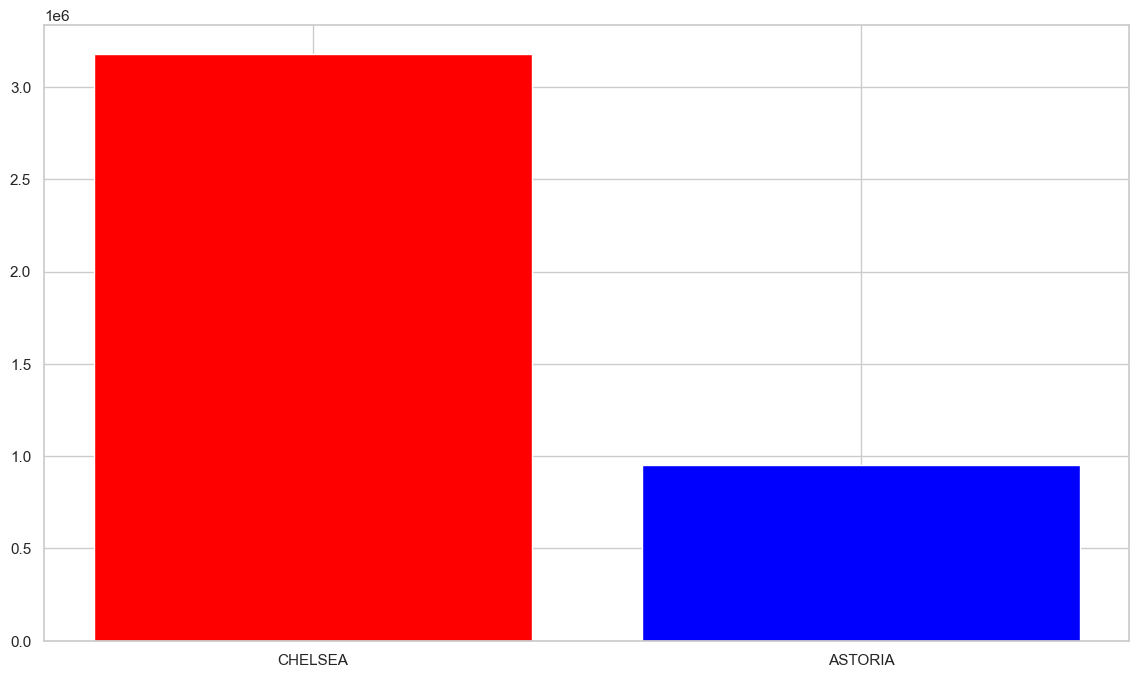

In [137]:
plt.figure(figsize=(14, 8))
neigh = ['CHELSEA', 'ASTORIA']
rata = [rata1, rata2]
plt.bar(neigh, rata, color=['red', 'blue'])
plt.show()

In [47]:
df1 = df1.dropna(subset=['BUILDING_CLASS_CATEGORY'])

In [48]:
df1['BUILDING_CLASS_CATEGORY'].unique()

array(['07 RENTALS - WALKUP APARTMENTS             ',
       '08 RENTALS - ELEVATOR APARTMENTS           ',
       '09 COOPS - WALKUP APARTMENTS               ',
       '10 COOPS - ELEVATOR APARTMENTS             ',
       '11A CONDO-RENTALS                           ',
       '12 CONDOS - WALKUP APARTMENTS              ',
       '13 CONDOS - ELEVATOR APARTMENTS            ',
       '14 RENTALS - 4-10 UNIT                     ',
       '15 CONDOS - 2-10 UNIT RESIDENTIAL          ',
       '16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT ',
       '17 CONDO COOPS                             ',
       '22 STORE BUILDINGS                         ',
       '37 RELIGIOUS FACILITIES                    ',
       '42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC  ',
       '46 CONDO STORE BUILDINGS                   ',
       '47 CONDO NON-BUSINESS STORAGE              ',
       '01 ONE FAMILY DWELLINGS                    ',
       '02 TWO FAMILY DWELLINGS                    ',
       '03 THREE FAMILY DWE

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  object        
 1   NEIGHBORHOOD                    84548 non-null  object        
 2   BUILDING_CLASS_CATEGORY         84548 non-null  object        
 3   TAX_CLASS_AT_PRESENT            84548 non-null  object        
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING_CLASS_AT_PRESENT       84548 non-null  object        
 7   ADDRESS                         84548 non-null  object        
 8   RESIDENTIAL_UNITS               84548 non-null  int64         
 9   COMMERCIAL_UNITS                84548 non-null  int64         
 10  TOTAL_UNITS                     84548 non-null  int64         
 11  LA

# Median

EDA 2 Perbandingan median harga rumah 2 kota?

In [50]:
median_rumah1 = df1[df1['NEIGHBORHOOD'] == 'ASTORIA']['SALE_PRICE'].median()
median_rumah2 = df1[df1['NEIGHBORHOOD'] == 'CHELSEA']['SALE_PRICE'].median()

In [51]:
median_rumah1
median_rumah2

1010000.0

In [53]:
median_data = pd.DataFrame({'NEIGHBORHOOD':['ASTORIA', 'CHELSEA'], 'SALE_PRICE':[median_rumah1, median_rumah2]}) 

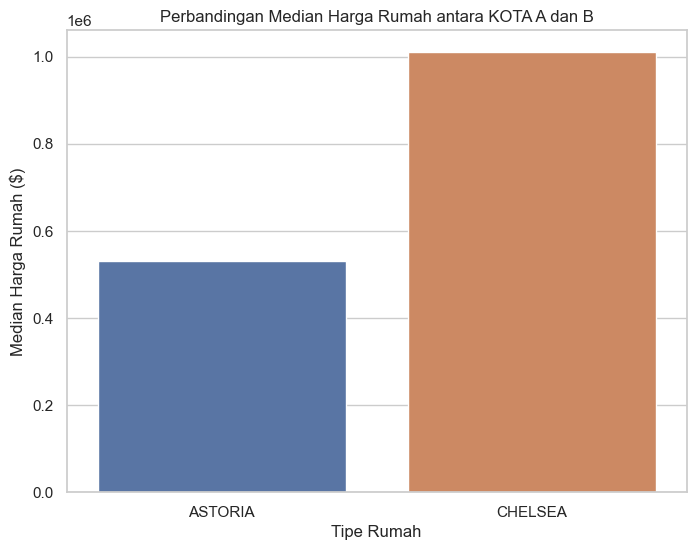

In [136]:
plt.figure(figsize=(8, 6))
sns.barplot(data=median_data, x='NEIGHBORHOOD', y='SALE_PRICE')
plt.xlabel('Tipe Rumah')
plt.ylabel('Median Harga Rumah ($)')
plt.title('Perbandingan Median Harga Rumah antara KOTA A dan B')
plt.show()

# Modus(Mode)

EDA

Apa tipe rumah yang paling sering muncul dalam dataset?

In [55]:
mode = df1['BUILDING_CLASS_CATEGORY'].mode()

In [56]:
mode

0    01 ONE FAMILY DWELLINGS                    
Name: BUILDING_CLASS_CATEGORY, dtype: object

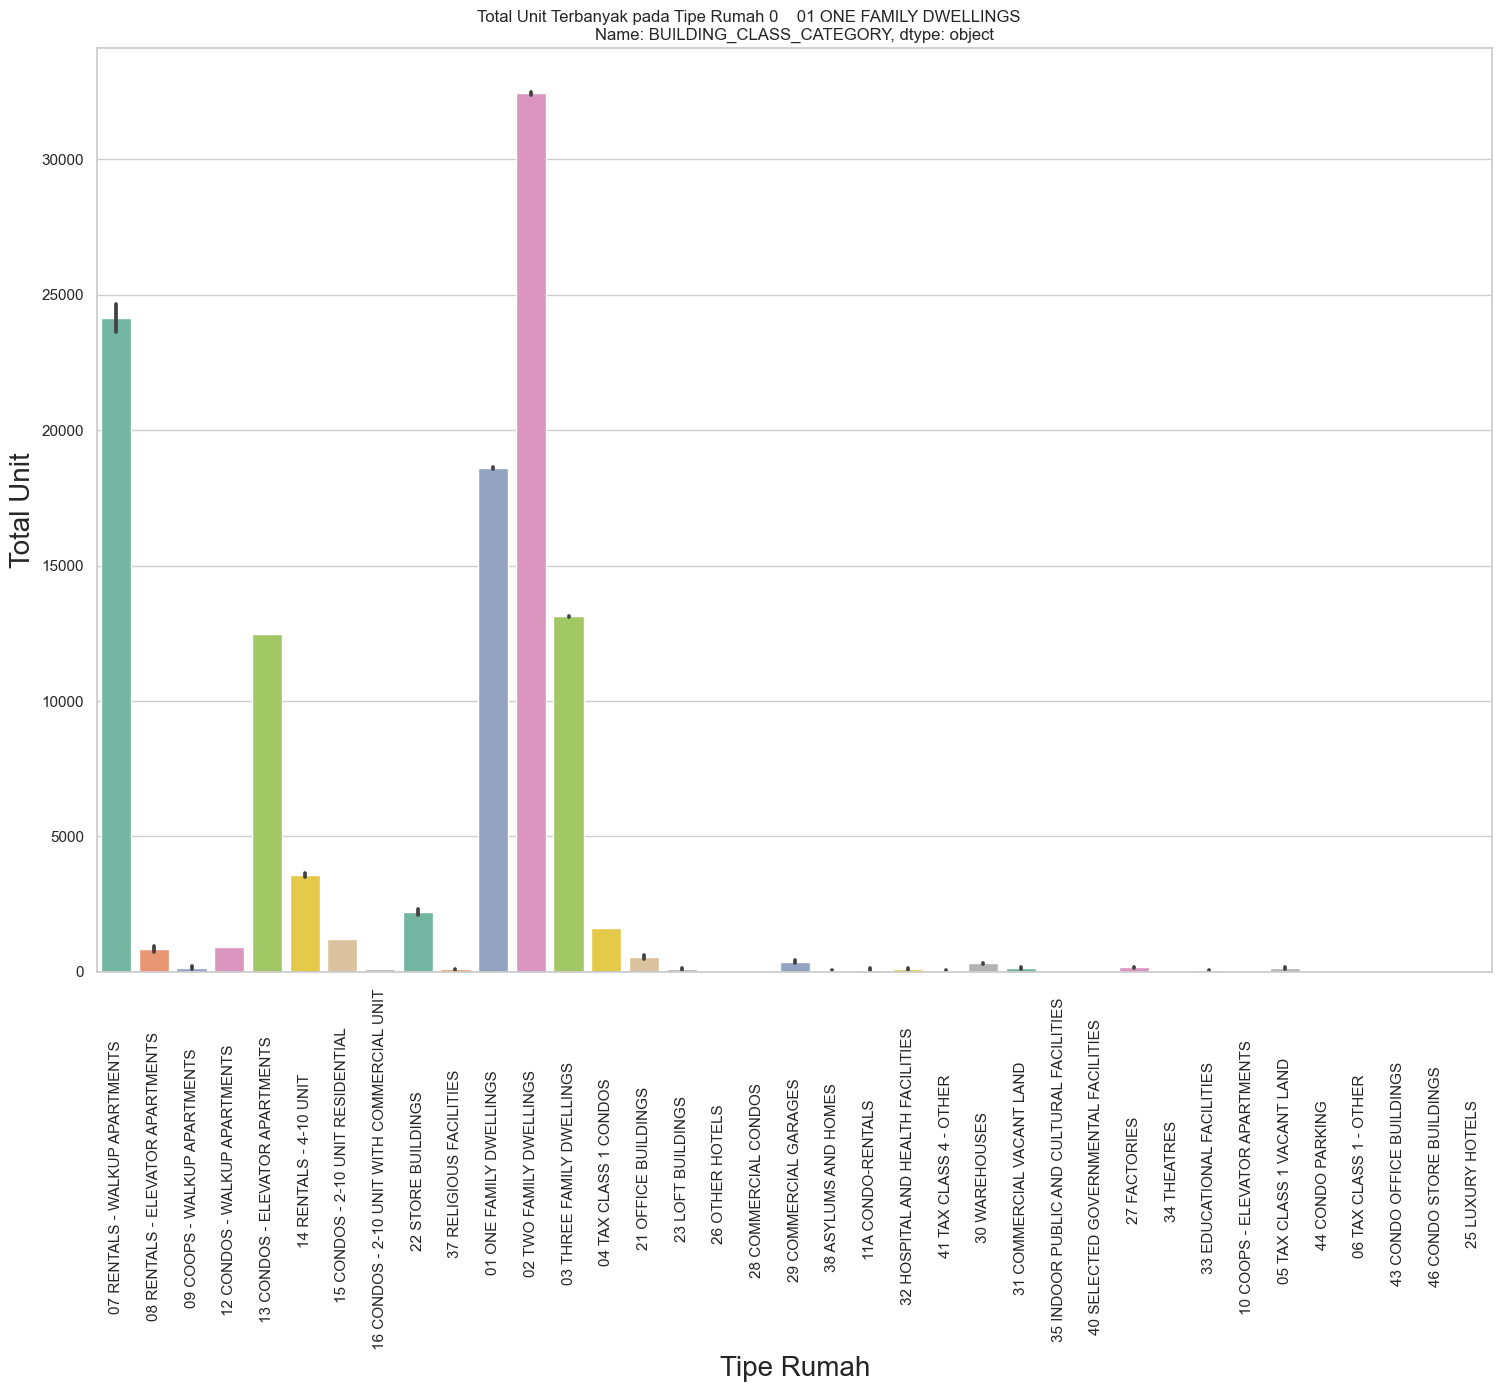

Tipe rumah dengan total unit terbanyak: 0    01 ONE FAMILY DWELLINGS                    
Name: BUILDING_CLASS_CATEGORY, dtype: object


In [135]:
plt.figure(figsize=(18, 12))
sns.barplot(data=df1, x='BUILDING_CLASS_CATEGORY', y='TOTAL_UNITS', estimator=sum, palette='Set2')
plt.xlabel('Tipe Rumah', fontsize=20)
plt.ylabel('Total Unit', fontsize=20)
plt.title(f'Total Unit Terbanyak pada Tipe Rumah {mode}')
plt.xticks(rotation=90)  # Memutar label sumbu x
plt.show()

print(f"Tipe rumah dengan total unit terbanyak: {mode}")

In [133]:
df1

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,...,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE DATE,SALE YEAR,SALE MONTH,SALE DATE,SALE DAY
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,5,0,...,6440.0,1900,2,C2,6625000.0,2017-07-19,2017,July,19,Wednesday
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,16,1,...,7803.0,1900,2,C7,530000.0,2016-12-09,2016,December,9,Friday
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10,0,...,6794.0,1913,2,C4,3936272.0,2016-09-23,2016,September,23,Friday
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,6,0,...,4615.0,1900,2,C2,8000000.0,2016-11-17,2016,November,17,Thursday
5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,C4,516 EAST 12TH STREET,20,0,...,9730.0,1900,2,C4,530000.0,2017-07-20,2017,July,20,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84542,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7339,41,B9,41 SONIA COURT,2,0,...,1800.0,1997,1,B9,530000.0,2016-12-01,2016,December,1,Thursday
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,2,0,...,2575.0,1998,1,B9,450000.0,2016-11-28,2016,November,28,Monday
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,2,0,...,2377.0,1998,1,B9,550000.0,2017-04-21,2017,April,21,Friday
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,2,0,...,1496.0,1925,1,B2,460000.0,2017-07-05,2017,July,5,Wednesday


# Range

EDA RANGE

Apakah ada tahun tertentu dengan rentang (range) harga rumah yang lebih besar daripada tahun lainnya?

In [61]:
# Mengelompokkan data berdasarkan tahun dan menghitung rentang harga rumah
rentang_harga_per_tahun = df1.groupby('YEAR_BUILT')['SALE_PRICE'].max() - df1.groupby('YEAR_BUILT')['SALE_PRICE'].min()

In [62]:
rentang_harga_per_tahun

YEAR_BUILT
0       345000000.0
1111            0.0
1680            0.0
1800      7090000.0
1826            0.0
           ...     
2013     67734101.0
2014    203345000.0
2015    174000000.0
2016     25456250.0
2017       870000.0
Name: SALE_PRICE, Length: 158, dtype: float64

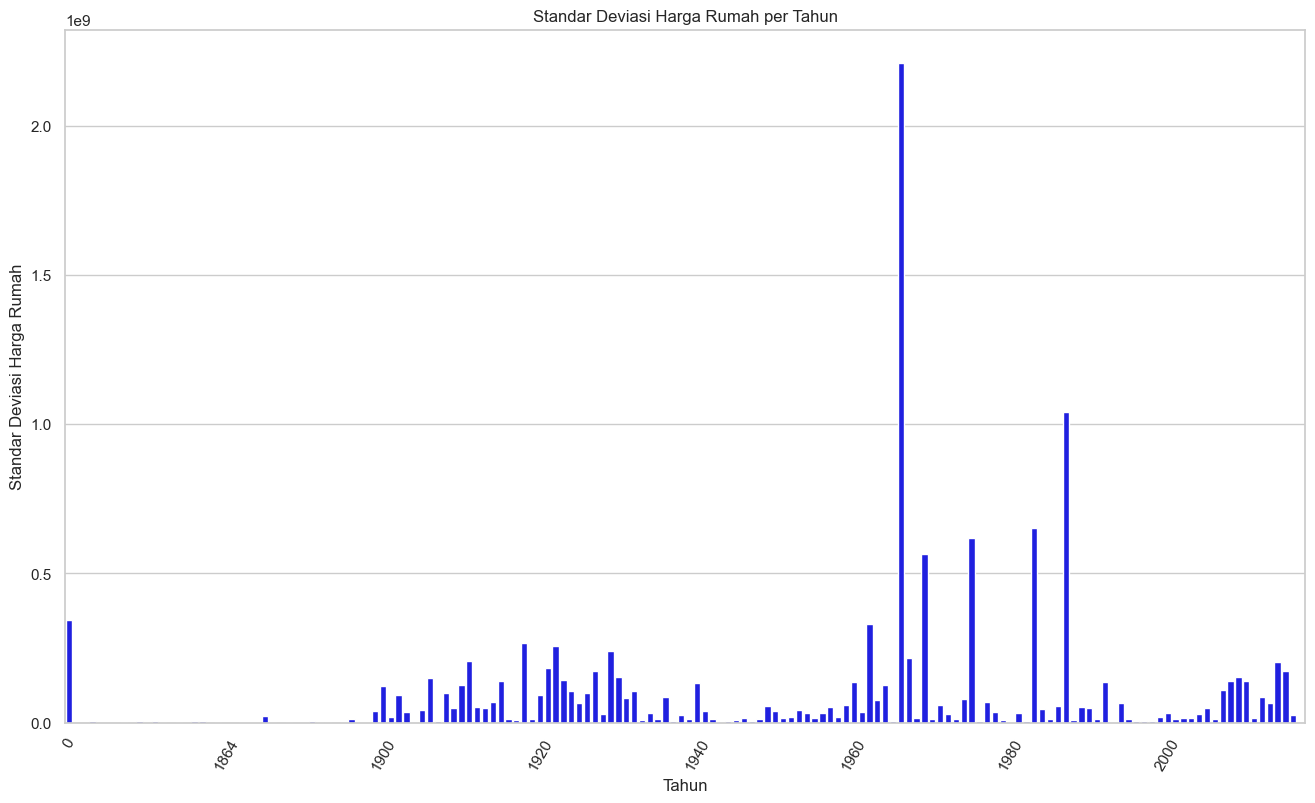

In [138]:
sns.set(style="whitegrid")

# Membuat bar plot
plt.figure(figsize=(16, 9))
ax = sns.barplot(x=rentang_harga_per_tahun.index, y=rentang_harga_per_tahun.values, color='blue')

# Menambahkan label
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xlabel('Tahun')
plt.ylabel('Standar Deviasi Harga Rumah')
plt.title('Standar Deviasi Harga Rumah per Tahun')
plt.xticks(rotation=60)  # Mengatur rotasi label tahun agar lebih terbaca

# Menampilkan plot
plt.show()

Text(0.5, 1.0, 'Distribusi Rentang Harga per Tahun')

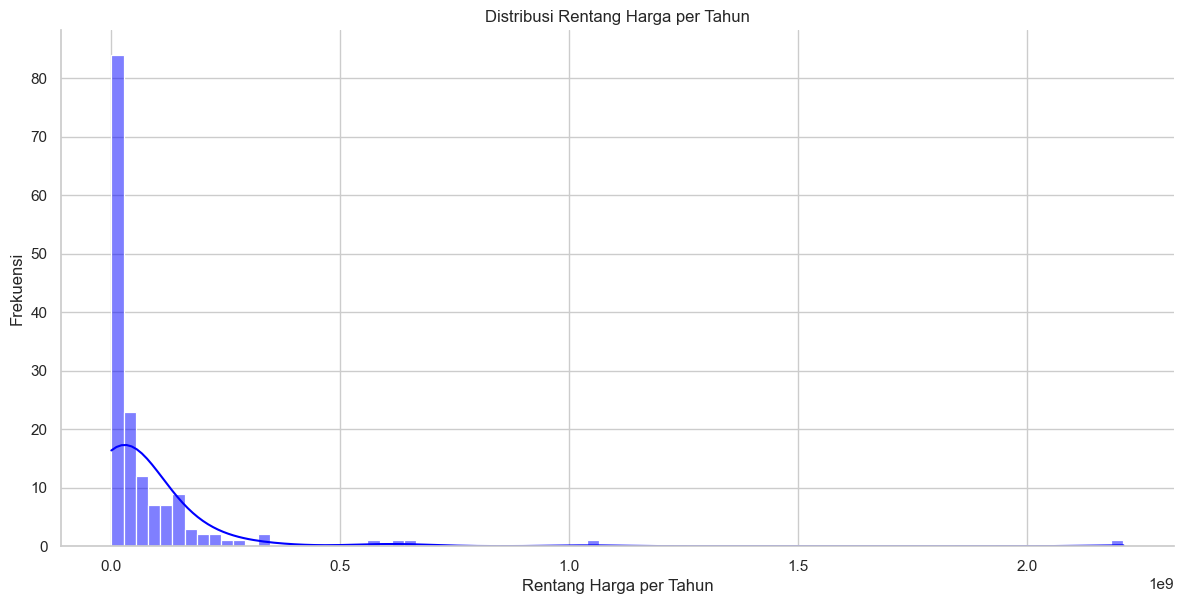

In [139]:
sns.set(style="whitegrid")
sns.displot(rentang_harga_per_tahun, kde=True, color='blue', height=6, aspect=2)
plt.xlabel('Rentang Harga per Tahun')
plt.ylabel('Frekuensi')
plt.title('Distribusi Rentang Harga per Tahun')

# Variance

EDA VARIANCE

Apakah ada tipe rumah tertentu yang memiliki variance harga rumah yang tinggi?

In [65]:
df1

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,28,3,31,4616.0,18690.0,1900,2,C7,530000.0,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,16,1,17,2212.0,7803.0,1900,2,C7,530000.0,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


In [66]:
variance_per_tipe_rumah = df1.groupby('BUILDING_CLASS_CATEGORY')['SALE_PRICE'].var().sort_values(ascending=False)

In [67]:
variance_per_tipe_rumah

BUILDING_CLASS_CATEGORY
21 OFFICE BUILDINGS                             2.003250e+16
25 LUXURY HOTELS                                6.063567e+15
08 RENTALS - ELEVATOR APARTMENTS                1.494378e+15
26 OTHER HOTELS                                 9.871386e+14
11A CONDO-RENTALS                               6.996548e+14
42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC       6.641164e+14
27 FACTORIES                                    3.617112e+14
38 ASYLUMS AND HOMES                            3.036530e+14
43 CONDO OFFICE BUILDINGS                       2.789386e+14
32 HOSPITAL AND HEALTH FACILITIES               2.635356e+14
28 COMMERCIAL CONDOS                            2.600086e+14
23 LOFT BUILDINGS                               2.479835e+14
29 COMMERCIAL GARAGES                           2.312046e+14
41 TAX CLASS 4 - OTHER                          2.303467e+14
35 INDOOR PUBLIC AND CULTURAL FACILITIES        2.049162e+14
31 COMMERCIAL VACANT LAND                       1.909872e+14


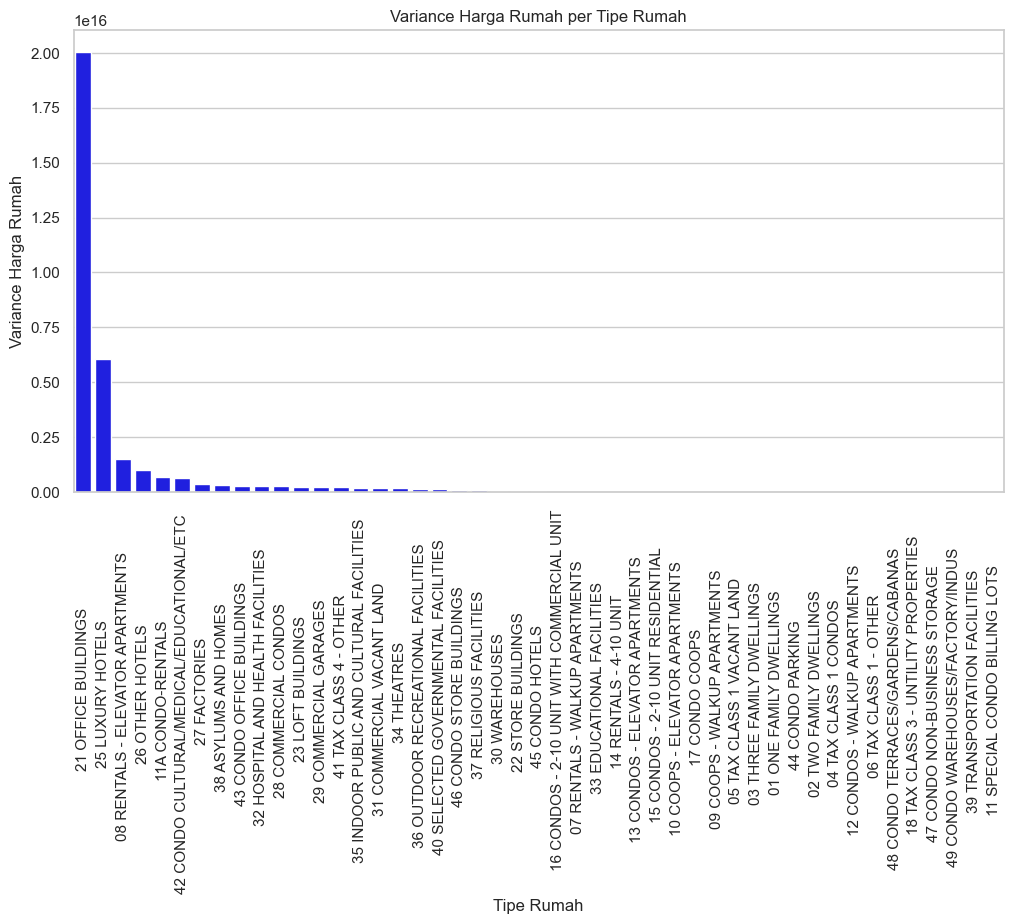

In [68]:
sns.set(style="whitegrid")

# Membuat bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=variance_per_tipe_rumah.index, y=variance_per_tipe_rumah.values, color='blue')

# Menambahkan label
plt.xlabel('Tipe Rumah')
plt.ylabel('Variance Harga Rumah')
plt.title('Variance Harga Rumah per Tipe Rumah')
plt.xticks(rotation=90)  # Mengatur rotasi label tipe rumah agar lebih terbaca

# Menampilkan plot
plt.show()

EDA STANDAR DEVIATION


In [132]:
df1

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,...,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE DATE,SALE YEAR,SALE MONTH,SALE DATE,SALE DAY
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,5,0,...,6440.0,1900,2,C2,6625000.0,2017-07-19,2017,July,19,Wednesday
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,16,1,...,7803.0,1900,2,C7,530000.0,2016-12-09,2016,December,9,Friday
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10,0,...,6794.0,1913,2,C4,3936272.0,2016-09-23,2016,September,23,Friday
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,6,0,...,4615.0,1900,2,C2,8000000.0,2016-11-17,2016,November,17,Thursday
5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,C4,516 EAST 12TH STREET,20,0,...,9730.0,1900,2,C4,530000.0,2017-07-20,2017,July,20,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84542,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7339,41,B9,41 SONIA COURT,2,0,...,1800.0,1997,1,B9,530000.0,2016-12-01,2016,December,1,Thursday
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,2,0,...,2575.0,1998,1,B9,450000.0,2016-11-28,2016,November,28,Monday
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,2,0,...,2377.0,1998,1,B9,550000.0,2017-04-21,2017,April,21,Friday
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,2,0,...,1496.0,1925,1,B2,460000.0,2017-07-05,2017,July,5,Wednesday


In [70]:
std_deviasi_per_tahun = df1.groupby('YEAR_BUILT')['SALE_PRICE'].std()

In [71]:
std_pertahun = std_deviasi_per_tahun.dropna()

In [72]:
std_pertahun

YEAR_BUILT
0       6.795731e+06
1800    1.266953e+06
1835    1.849084e+06
1840    3.747666e+05
1844    5.232590e+06
            ...     
2013    5.737109e+06
2014    7.184195e+06
2015    4.837227e+06
2016    1.331590e+06
2017    3.735996e+05
Name: SALE_PRICE, Length: 150, dtype: float64

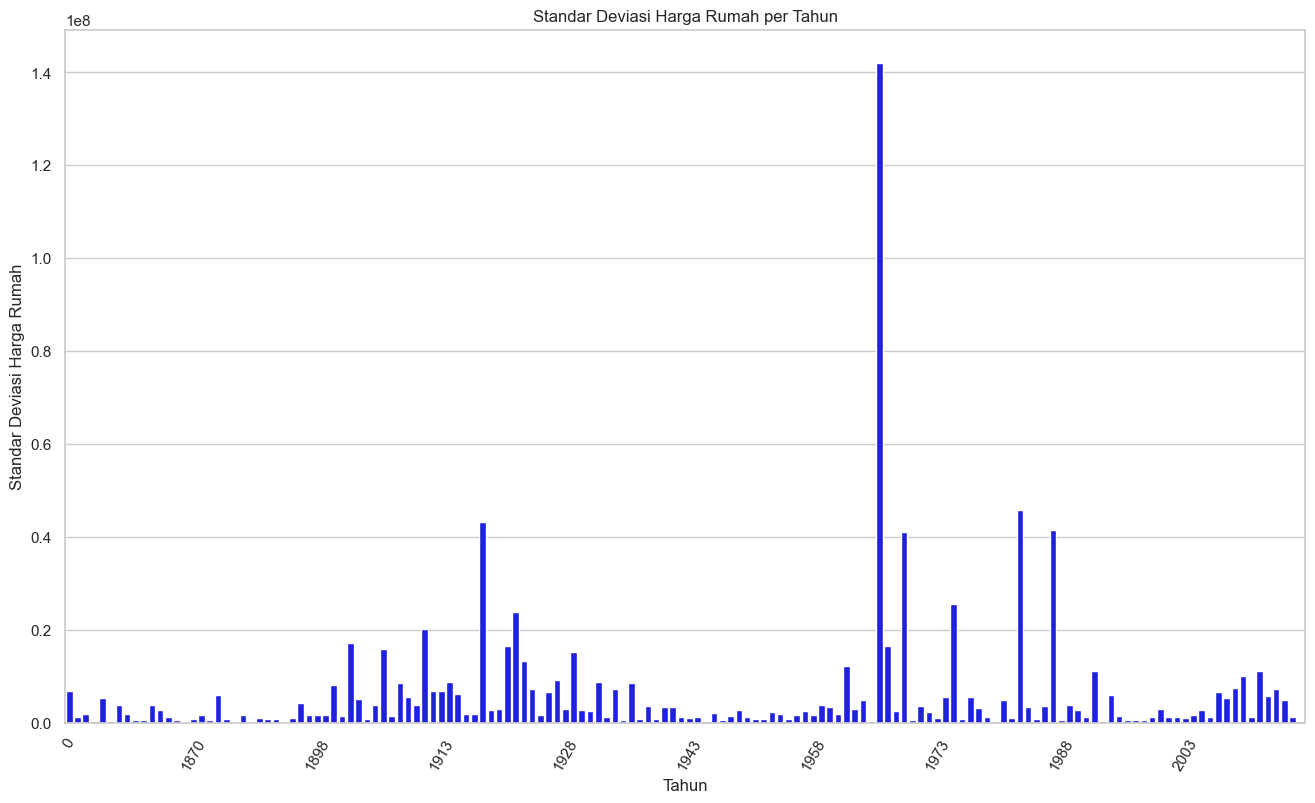

In [131]:
sns.set(style="whitegrid")

# Membuat bar plot
plt.figure(figsize=(16, 9))
ax = sns.barplot(x=std_pertahun.index, y=std_pertahun.values, color='blue')

# Menambahkan label
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xlabel('Tahun')
plt.ylabel('Standar Deviasi Harga Rumah')
plt.title('Standar Deviasi Harga Rumah per Tahun')
plt.xticks(rotation=60)  # Mengatur rotasi label tahun agar lebih terbaca

# Menampilkan plot
plt.show()

Text(0.5, 1.0, 'Distribusi Rentang Harga per Tahun')

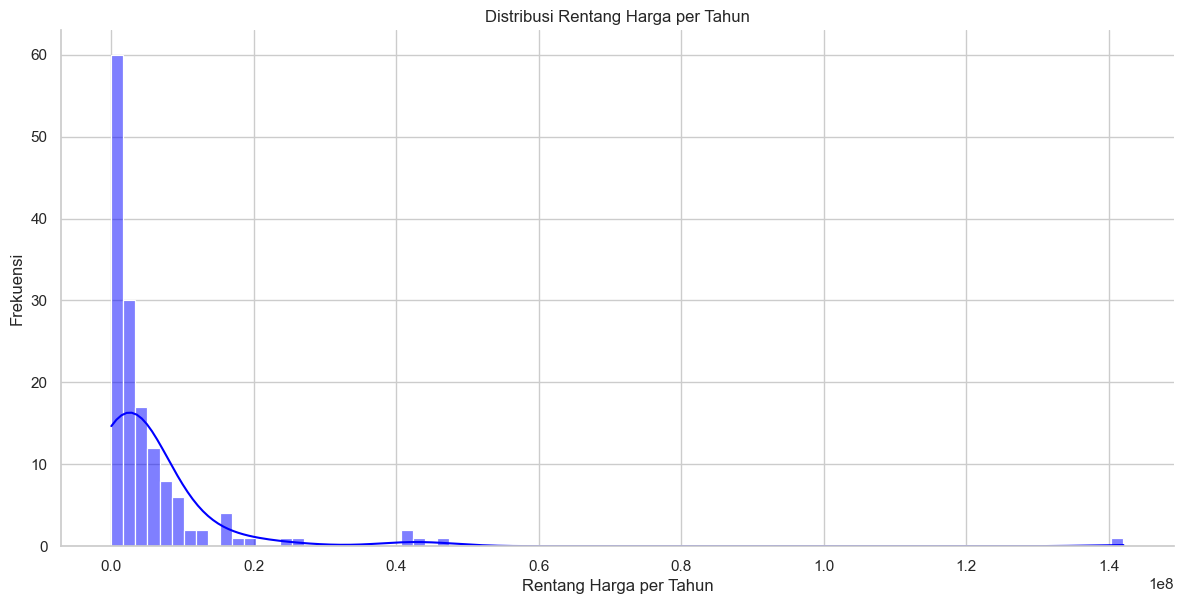

In [74]:
sns.set(style="whitegrid")
sns.displot(std_pertahun, kde=True, color='blue', height=6, aspect=2)
plt.xlabel('Rentang Harga per Tahun')
plt.ylabel('Frekuensi')
plt.title('Distribusi Rentang Harga per Tahun')

In [75]:
u = df1[df1['NEIGHBORHOOD'] == 'WOODROW']['SALE_PRICE']
v = df1[df1['NEIGHBORHOOD'] == 'ALPHABET CITY']['SALE_PRICE']

In [76]:
sct = scipy.stats.norm.rvs(loc=5, size=len(u), scale=1)

In [77]:
sct

array([3.38011425, 5.59945621, 6.15466171, 5.01289615, 4.97745324,
       6.00565891, 4.54220844, 5.56643621, 6.42675476, 5.31869055,
       3.73397802, 5.64004929, 4.81603969, 4.73561462, 4.65703888,
       5.96935445, 3.29769143, 6.23597663, 4.14507345, 5.23655473,
       4.84514886, 2.86927694, 5.43211291, 4.45585474, 3.65527394,
       5.22785369, 5.67661726, 4.8374063 , 4.24749606, 6.41137375,
       5.88574189, 5.23145408, 5.4003494 , 4.16087385, 7.15791853,
       6.28401719, 5.21024338, 4.41362857, 3.35185934, 5.58801152,
       6.07997153, 5.6601295 , 7.23973766, 4.23902106, 5.28311116,
       4.90801773, 4.30496093, 6.62687538, 5.39508845, 3.59821739,
       5.6315758 , 4.68679029, 3.68814413, 5.44218822, 4.43920601,
       4.92974667, 3.47805608, 5.67206095, 4.93706067, 5.31350485,
       4.1891905 , 3.22305645, 5.62139868, 3.54624617, 3.74989626,
       4.79895871, 5.9361673 , 4.26975422, 7.38316556, 5.79583421,
       5.2010378 , 5.72796357, 6.91935319, 5.60127056, 4.38596

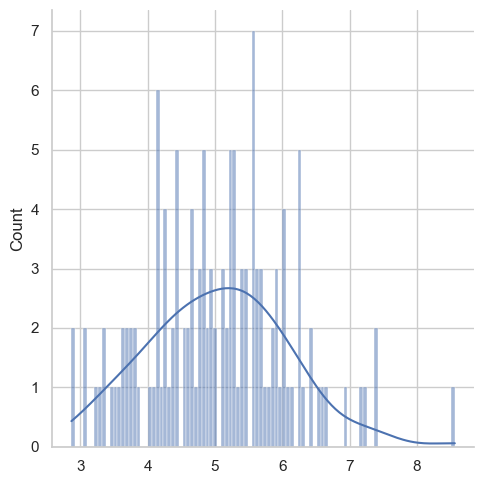

In [78]:
ax = sns.displot(
    sct,
    bins=100,
    kde=True
)

In [79]:
sct1 = scipy.stats.norm.rvs(loc=0, size=len(v), scale=1)

In [80]:
sct1

array([ 0.83755499, -1.40159394,  0.17821461, -0.49542113, -1.01086683,
       -0.36747935, -0.71364554, -0.16178606,  1.79454962,  0.11441384,
       -0.05078455,  1.79080963, -0.81557451, -1.48672264,  1.01447771,
        0.5278452 , -0.06756697,  0.02849663, -0.57138914, -0.47385438,
        0.47689791,  2.12555574, -1.78536571,  0.6827301 , -1.07926304,
        0.91550403, -0.54520027,  0.08244487, -0.35003068,  0.44546925,
        1.35418267, -0.35049007, -1.836737  , -0.61112509, -0.9805116 ,
        1.03651451, -0.15362795,  2.02302869, -1.08270593, -0.93778443,
        0.04581745, -1.72428812,  1.54774663,  0.14269809, -0.70728355,
       -2.05392534, -1.65215719,  1.1107044 , -0.73735907,  1.53258874,
       -0.48348327,  2.28003326, -0.60201503,  0.21574167, -0.14936034,
        0.99642097,  0.90019813,  2.32567717, -0.64918011, -2.0372977 ,
        1.3840621 , -0.76309052, -0.53016713, -1.64134044,  0.39120202,
       -0.27520333,  0.73229915,  0.18477228, -0.81582868, -0.15

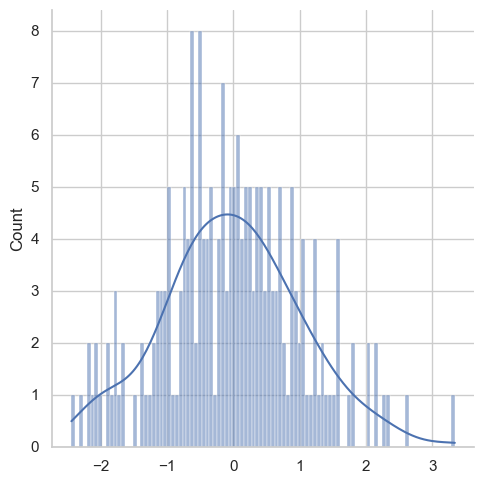

In [81]:
bx = sns.displot(
    sct1,
    bins=100,
    kde=True
)

In [82]:
Z = [x + y for x, y in zip(sct, sct1)]

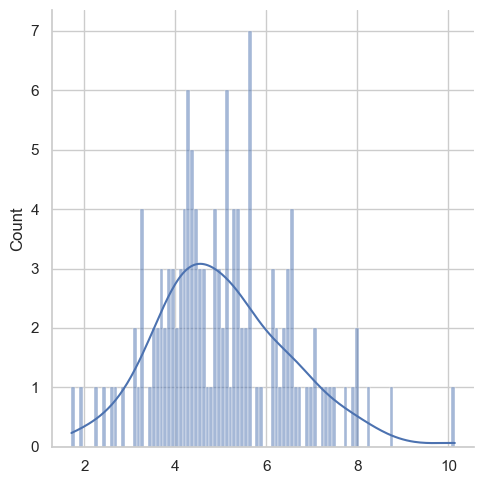

In [83]:
cx = sns.displot(
    Z,
    bins=100,
    kde=True
)

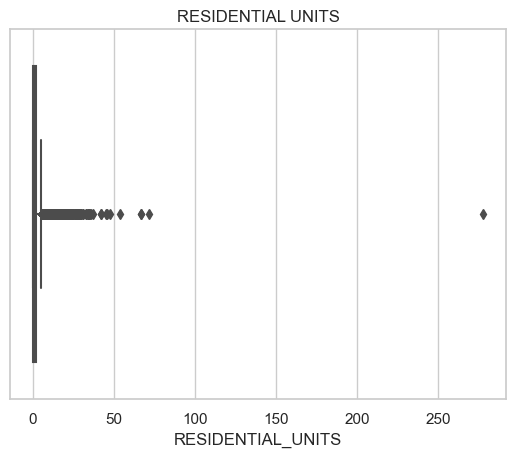

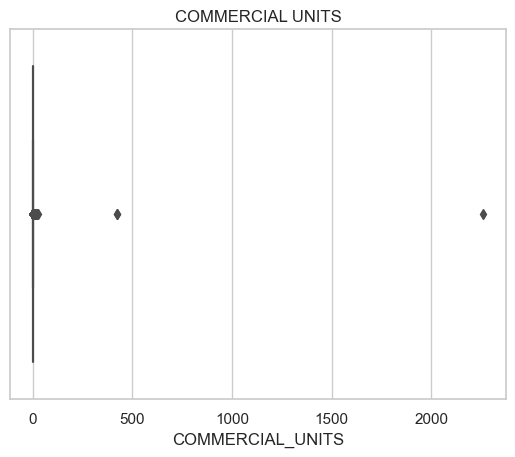

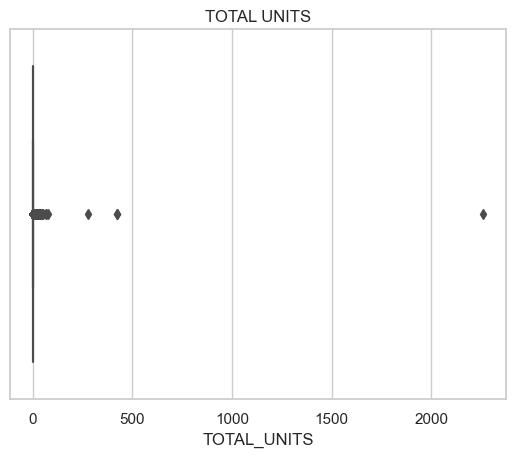

In [127]:
# ploting using boxplot to see the outliers
sns.boxplot(x='RESIDENTIAL_UNITS',data=df1)
plt.title('RESIDENTIAL UNITS')
plt.show()

sns.boxplot(x='COMMERCIAL_UNITS',data=df1)
plt.title('COMMERCIAL UNITS')
plt.show()

sns.boxplot(x='TOTAL_UNITS',data=df1)
plt.title('TOTAL UNITS')
plt.show()

In [128]:
# hapus data properti sisa yang memiliki nilai 0 unit total
df1 = df1[(df1['TOTAL_UNITS'] > 0) & (df1['TOTAL_UNITS'] < 30)]

#Hapus data dimana 'COMMERCIAL UNITS' + 'RESIDENTIAL UNITS' tidak sama dengan total units
df1 = df1[df1['TOTAL_UNITS'] == df1['COMMERCIAL_UNITS'] + df1['RESIDENTIAL_UNITS']]

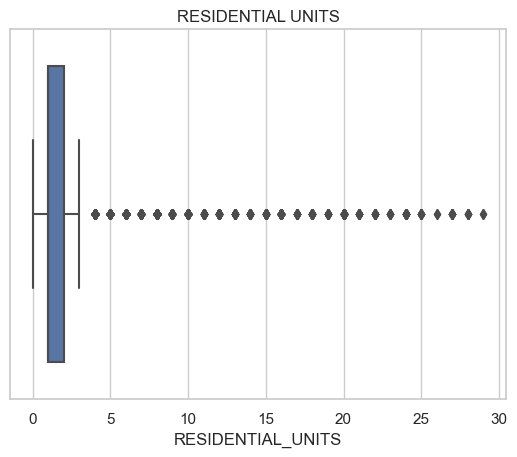

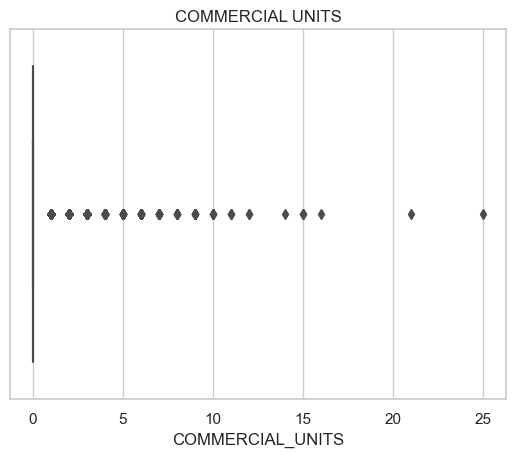

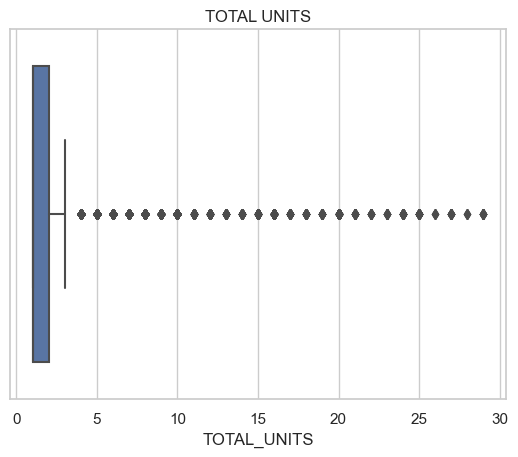

In [129]:
sns.boxplot(x='RESIDENTIAL_UNITS',data=df1)
plt.title('RESIDENTIAL UNITS')
plt.show()

sns.boxplot(x='COMMERCIAL_UNITS',data=df1)
plt.title('COMMERCIAL UNITS')
plt.show()

sns.boxplot(x='TOTAL_UNITS',data=df1)
plt.title('TOTAL UNITS')
plt.show()

In [84]:
pop_mean_sale_price = df1['SALE_PRICE'].mean()
pop_mean_sale_price

1147900.4933174055

In [85]:
pop_std_sale_price = df1['SALE_PRICE'].std()
pop_std_sale_price

10380580.326945972

In [99]:
df1['SALE_PRICE'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 84548 entries, 0 to 84547
Series name: SALE_PRICE
Non-Null Count  Dtype  
--------------  -----  
84548 non-null  float64
dtypes: float64(1)
memory usage: 660.7 KB


In [110]:
df1.var()

C:\Users\MINAN\AppData\Local\Temp\ipykernel_920\2870725145.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.var()


BLOCK                1.273250e+07
LOT                  4.331441e+05
RESIDENTIAL_UNITS    2.795931e+02
COMMERCIAL_UNITS     7.591956e+01
TOTAL_UNITS          3.599590e+02
LAND_SQUARE_FEET     1.215347e+09
GROSS_SQUARE_FEET    8.264625e+08
SALE_PRICE           1.077564e+14
SALE YEAR            2.271508e-01
SALE DATE            7.774290e+01
dtype: float64

In [111]:
print(df1['BUILDING_CLASS_CATEGORY'].mode())
df1['BUILDING_CLASS_CATEGORY'].value_counts()

0    01 ONE FAMILY DWELLINGS                    
Name: BUILDING_CLASS_CATEGORY, dtype: object


01 ONE FAMILY DWELLINGS                         18235
02 TWO FAMILY DWELLINGS                         15828
13 CONDOS - ELEVATOR APARTMENTS                 12989
10 COOPS - ELEVATOR APARTMENTS                  12902
03 THREE FAMILY DWELLINGS                        4384
07 RENTALS - WALKUP APARTMENTS                   3466
09 COOPS - WALKUP APARTMENTS                     2767
04 TAX CLASS 1 CONDOS                            1656
44 CONDO PARKING                                 1441
15 CONDOS - 2-10 UNIT RESIDENTIAL                1281
05 TAX CLASS 1 VACANT LAND                       1248
17 CONDO COOPS                                   1201
22 STORE BUILDINGS                                935
12 CONDOS - WALKUP APARTMENTS                     926
14 RENTALS - 4-10 UNIT                            671
29 COMMERCIAL GARAGES                             587
43 CONDO OFFICE BUILDINGS                         475
31 COMMERCIAL VACANT LAND                         463
08 RENTALS - ELEVATOR APARTM

Hipotesis Testing

In [112]:
df_borough = df1.groupby('BOROUGH', axis=0).sum()
df_borough

C:\Users\MINAN\AppData\Local\Temp\ipykernel_920\2441156735.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_borough = df1.groupby('BOROUGH', axis=0).sum()


,BLOCK,LOT,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,SALE_PRICE,SALE YEAR,SALE DATE
BOROUGH,,,,,,,,,,
Bronx,29614171,2116480,24225,1134,25403,2.782305e+07,3.189214e+07,4.160275e+09,14215397,117211
Brooklyn,103719488,8123590,48951,3558,53400,5.209205e+07,6.180932e+07,2.006694e+10,48494398,392451
Manhattan,20286009,13714881,42241,5486,48504,7.532553e+07,1.309018e+08,5.024619e+10,36917003,297924
Queens,177256209,6142074,45491,5517,51841,1.114270e+08,9.540064e+07,1.804100e+10,53917053,437373
Staten Island,27372513,1711963,10324,670,11016,6.659322e+07,2.205262e+07,4.538281e+09,16959972,133385


In [118]:
Bronx = df1[df1['BOROUGH']=='Bronx']
Staten_Island = df1[df1['BOROUGH']=='Staten Island']

In [119]:
total_unit_Bronx = df_borough.iloc[0, 4]
mu_Bronx = Bronx['SALE_PRICE'].mean()
std_Bronx = Bronx['SALE_PRICE'].std()
total_unit_Bronx, mu_Bronx, std_Bronx

(25403, 590193.6434955313, 2783057.797861863)

In [121]:
total_unit_SI = df_borough.iloc[-1, 4]
mu_SI = Staten_Island['SALE_PRICE'].mean()
std_SI = Staten_Island['SALE_PRICE'].std()
total_unit_SI, mu_SI, std_SI

(11016, 539629.114744352, 1607774.9605881933)

In [123]:
from statsmodels.stats.weightstats import ztest
ztest, pval= ztest(Staten_Island['SALE_PRICE'],Bronx['SALE_PRICE'])
print("pval: ",float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

pval:  0.1588052488400974
accept null hypothesis
